In [73]:
from preprocessing import read_csv_files,filter_nodes
import pandas as pd
from functools import reduce
from datetime import datetime

In [74]:
filenames = ["champs-elysees-12-12.csv", "convention-12-12.csv", "saints-peres-12-12.csv"]
dfs_real = read_csv_files("./data", filenames)

df_real = pd.concat(dfs_real)

In [75]:
def filter_nodes_real(df):
    noeuds_amont_aval = {
        "champs-elysees-12-12.csv": {
            "amont": "Av_Champs_Elysees-Washington",
            "aval": "Av_Champs_Elysees-Berri",
        },
        "convention-12-12.csv": {"amont": "Lecourbe-Convention", "aval": "Convention-Blomet"},
        "saints-peres-12-12.csv": {
            "amont": "Sts_Peres-Voltaire",
            "aval": "Sts_Peres-Universite",
        },
    }
    filtering_criteria = []
    for k, v in noeuds_amont_aval.items():
        criterion = (
            (df["filename"] == k)
            & (df["Libelle noeud amont"] == v["amont"])
            & (df["Libelle noeud aval"] == v["aval"])
        )
        filtering_criteria.append(criterion)

    mask = reduce(lambda x, y: x | y, filtering_criteria)
    return df[mask]

In [76]:
df_real = filter_nodes_real(df_real)

In [26]:
df_real = df_real[df_real['Date et heure de comptage']>=datetime(2022, 12, 9)]

In [29]:
df_real_ce = df_real[df_real['filename']=='champs-elysees-12-12.csv']
df_real_sts = df_real[df_real['filename']=='saints-peres-12-12.csv']
df_real_conv = df_real[df_real['filename']=='convention-12-12.csv']

In [38]:
df_preds = pd.read_csv('predictions/output_epsilon_consulting.csv')
df_preds['datetime'] = pd.to_datetime(df_preds['datetime'])

In [39]:
df_preds_ce = df_preds[(df_preds['arc']=='Champs Elysées')]
df_preds_sts = df_preds[(df_preds['arc']=='Saints-Pères')]
df_preds_conv = df_preds[(df_preds['arc']=='Convention')]

In [45]:
df_merged_ce = df_preds_ce.merge(df_real_ce,left_on='datetime',right_on='Date et heure de comptage',how='inner')
df_merged_sts = df_preds_sts.merge(df_real_sts,left_on='datetime',right_on='Date et heure de comptage',how='inner')
df_merged_conv = df_preds_conv.merge(df_real_conv,left_on='datetime',right_on='Date et heure de comptage',how='inner')

## Saints pères

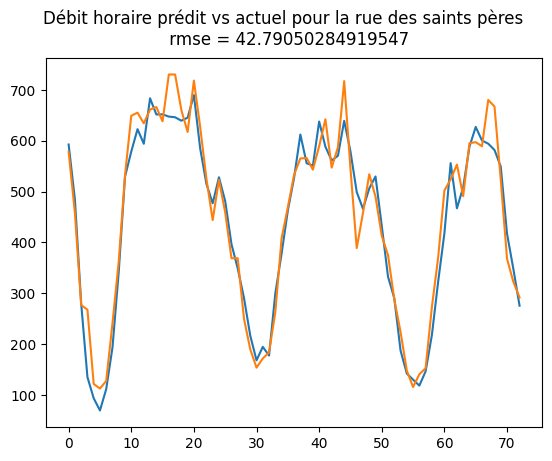

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
df_merged_sts['debit_horaire'].plot()
df_merged_sts['Débit horaire'].plot()
rmse = mean_squared_error(df_merged_sts['debit_horaire'],df_merged_sts['Débit horaire'],squared=False)
plot = plt.suptitle('Débit horaire prédit vs actuel pour la rue des saints pères \n rmse = {}'.format(rmse))

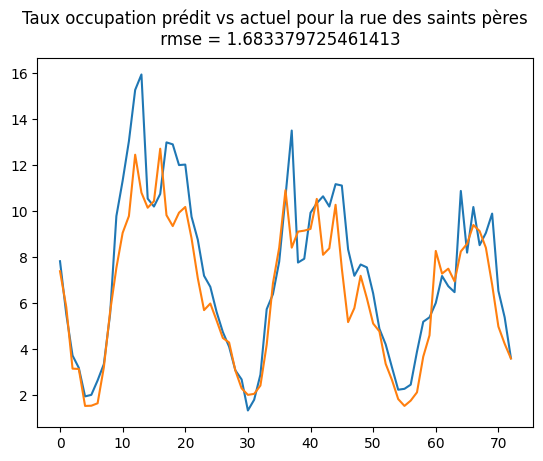

In [53]:
df_merged_sts['taux_occupation'].plot()
df_merged_sts["Taux d'occupation"].plot()
rmse = mean_squared_error(df_merged_sts['taux_occupation'],df_merged_sts["Taux d'occupation"],squared=False)
plot = plt.suptitle('Taux occupation prédit vs actuel pour la rue des saints pères \n rmse = {}'.format(rmse))

## Champs Elysées

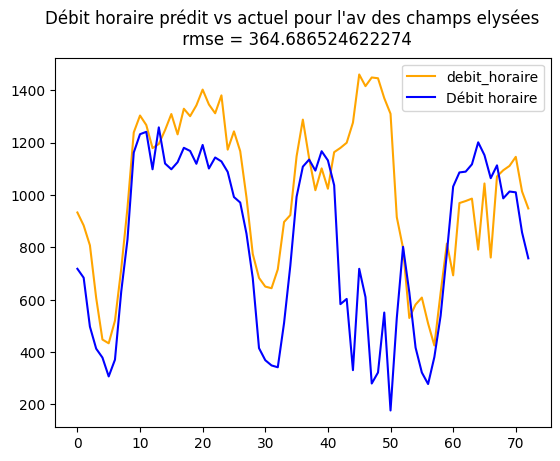

In [64]:
df_merged_ce['debit_horaire'].plot(color='orange')
df_merged_ce['Débit horaire'].plot(color='blue')
rmse = mean_squared_error(df_merged_ce['debit_horaire'],df_merged_ce['Débit horaire'],squared=False)
plot = plt.suptitle("Débit horaire prédit vs actuel pour l'av des champs elysées \n rmse = {}".format(rmse))
plt.legend()

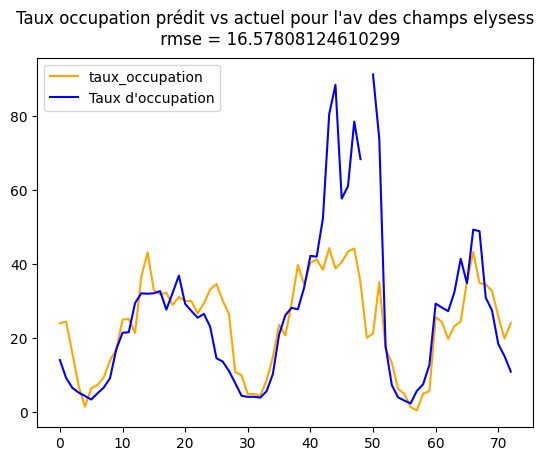

In [63]:
df_merged_ce['taux_occupation'].plot(color='orange')
df_merged_ce["Taux d'occupation"].plot(color='blue')
rmse = mean_squared_error(df_merged_ce['taux_occupation'],df_merged_ce["Taux d'occupation"].interpolate(),squared=False)
plot = plt.suptitle("Taux occupation prédit vs actuel pour l'av des champs elysess \n rmse = {}".format(rmse))
plt.legend()

## Convention

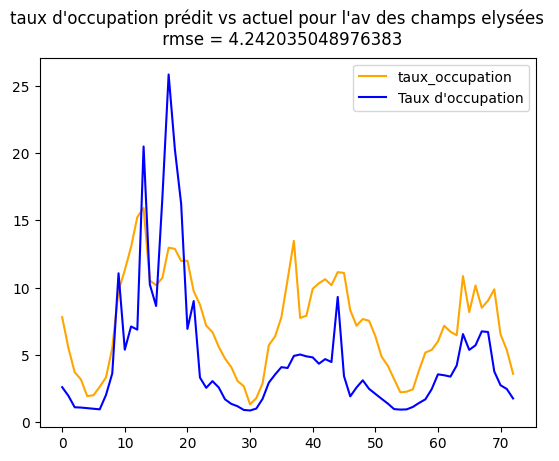

In [72]:
df_merged_conv['taux_occupation'].plot(color='orange')
df_merged_conv["Taux d'occupation"].interpolate().plot(color='blue')
rmse = mean_squared_error(df_merged_conv['taux_occupation'],df_merged_conv["Taux d'occupation"].interpolate(),squared=False)
plot = plt.suptitle("taux d'occupation prédit vs actuel pour l'av des champs elysées \n rmse = {}".format(rmse))
plt.legend()

,Unnamed: 0,arc,datetime,debit_horaire,taux_occupation,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape,filename
0,0,Convention,2022-12-09 00:00:00,592.41360,7.810947,Convention,2022-12-09 00:00:00,NaN,2.60556,Fluide,2937,Lecourbe-Convention,2973,Convention-Blomet,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.293205602717535","{""coordinates"": [[2.2918783062727064, 48.83923...",convention-12-12.csv
1,1,Convention,2022-12-09 01:00:00,484.34055,5.512499,Convention,2022-12-09 01:00:00,NaN,1.96111,Fluide,2937,Lecourbe-Convention,2973,Convention-Blomet,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.293205602717535","{""coordinates"": [[2.2918783062727064, 48.83923...",convention-12-12.csv
2,2,Convention,2022-12-09 02:00:00,280.49564,3.715930,Convention,2022-12-09 02:00:00,NaN,1.11278,Fluide,2937,Lecourbe-Convention,2973,Convention-Blomet,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.293205602717535","{""coordinates"": [[2.2918783062727064, 48.83923...",convention-12-12.csv
3,3,Convention,2022-12-09 03:00:00,135.45500,3.179416,Convention,2022-12-09 03:00:00,NaN,1.09111,Fluide,2937,Lecourbe-Convention,2973,Convention-Blomet,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.293205602717535","{""coordinates"": [[2.2918783062727064, 48.83923...",convention-12-12.csv
4,4,Convention,2022-12-09 04:00:00,93.92825,1.939833,Convention,2022-12-09 04:00:00,NaN,NaN,Inconnu,2937,Lecourbe-Convention,2973,Convention-Blomet,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.293205602717535","{""coordinates"": [[2.2918783062727064, 48.83923...",convention-12-12.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,68,Convention,2022-12-11 20:00:00,581.61346,9.040451,Convention,2022-12-11 20:00:00,NaN,6.70889,Fluide,2937,Lecourbe-Convention,2973,Convention-Blomet,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.293205602717535","{""coordinates"": [[2.2918783062727064, 48.83923...",convention-12-12.csv
69,69,Convention,2022-12-11 21:00:00,549.07733,9.879696,Convention,2022-12-11 21:00:00,NaN,3.77056,Fluide,2937,Lecourbe-Convention,2973,Convention-Blomet,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.293205602717535","{""coordinates"": [[2.2918783062727064, 48.83923...",convention-12-12.csv
70,70,Convention,2022-12-11 22:00:00,417.31740,6.521362,Convention,2022-12-11 22:00:00,NaN,2.75000,Fluide,2937,Lecourbe-Convention,2973,Convention-Blomet,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.293205602717535","{""coordinates"": [[2.2918783062727064, 48.83923...",convention-12-12.csv
71,71,Convention,2022-12-11 23:00:00,348.73430,5.373186,Convention,2022-12-11 23:00:00,NaN,2.47056,Fluide,2937,Lecourbe-Convention,2973,Convention-Blomet,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.293205602717535","{""coordinates"": [[2.2918783062727064, 48.83923...",convention-12-12.csv


<AxesSubplot: xlabel='ds'>

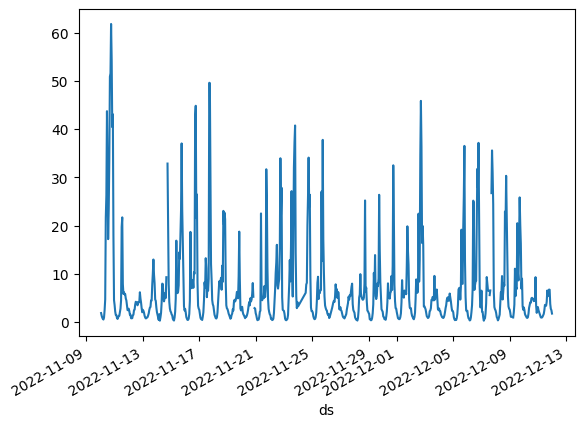

In [80]:
df_real[(df_real['filename']=='convention-12-12.csv') & (df_real['Date et heure de comptage']>datetime(2022,11,10))]["Taux d'occupation"].plot()